Python script for testing a pre-trained object detection network (ODN). The script uses YOLOv8, which is trained on the COCO dataset (80 classes) and provides excellent accuracy and speed. This is for images.

In [2]:
pip install ultralytics opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

Saving WhatsApp Image 2025-03-22 at 09.03.30.jpeg to WhatsApp Image 2025-03-22 at 09.03.30 (1).jpeg
Uploaded image path: /content/WhatsApp Image 2025-03-22 at 09.03.30 (1).jpeg

0: 640x480 2 persons, 2 potted plants, 186.8ms
Speed: 4.2ms preprocess, 186.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


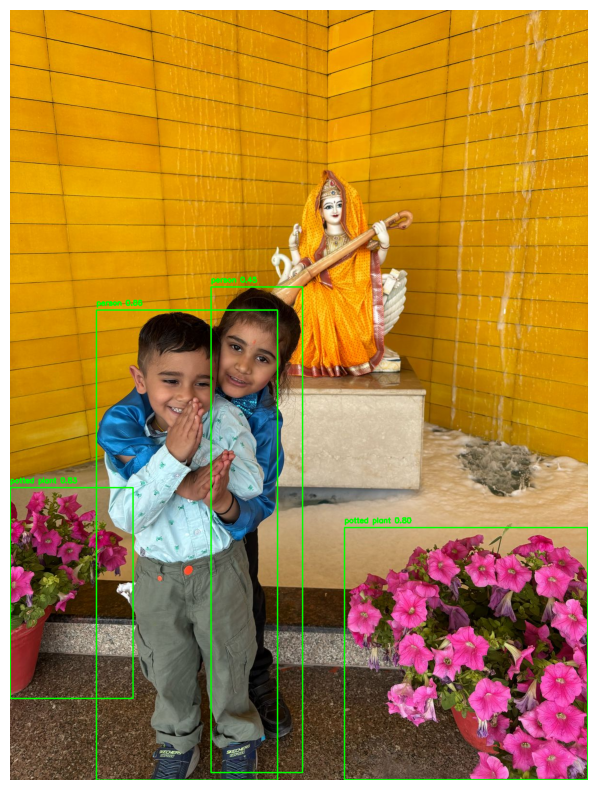

In [4]:
# Import libraries
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from google.colab import files
import os

# 📤 Upload an image
uploaded = files.upload()

# Get the uploaded image path
image_path = list(uploaded.keys())[0]  # Use the uploaded image path
print(f"Uploaded image path: /content/{image_path}")

# Load YOLOv8 pre-trained model (trained on COCO dataset)
model = YOLO('yolov8n.pt')  # 'n' for nano, other options: 's', 'm', 'l', 'x'

# Read the uploaded image
image = cv2.imread(f"/content/{image_path}")

# Run object detection
results = model(image)

# Plot the results using OpenCV
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()  # Bounding box coordinates (x1, y1, x2, y2)
    scores = result.boxes.conf.cpu().numpy()  # Confidence scores
    labels = result.boxes.cls.cpu().numpy()  # Class labels

    for box, score, label in zip(boxes, scores, labels):
        x1, y1, x2, y2 = map(int, box)
        label_name = model.names[int(label)]

        # Draw bounding boxes
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, f"{label_name} {score:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display image with detections
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in Colab
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


For images and Videos, YOLOv8

In [5]:
!pip install ultralytics --upgrade
!pip install opencv-python


In [9]:
# Import Libraries
import cv2
from ultralytics import YOLO
from google.colab import files
import os
import matplotlib.pyplot as plt

# 📥 Upload Image or Video
print("Upload an image or video file:")
uploaded = files.upload()

# Get the uploaded file path
file_path = list(uploaded.keys())[0]
print(f"Uploaded file: /content/{file_path}")

# Check if the uploaded file is an image or a video
def is_video(file_name):
    video_exts = ['.mp4', '.avi', '.mov', '.mkv', '.flv']
    return any(file_name.lower().endswith(ext) for ext in video_exts)

# ✅ Load YOLOv8 model
model = YOLO('yolov8n.pt')  # YOLOv8 Nano model (faster, less accurate)
# Use 'yolov8s.pt' for small, 'yolov8m.pt' for medium, 'yolov8l.pt' for large

# 🖼️ **If the file is an image**
if not is_video(file_path):
    print("Detected: Image")

    # Read the image
    image = cv2.imread(f"/content/{file_path}")

    # Perform object detection
    results = model(image)

    # Draw bounding boxes
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()  # Bounding box coordinates
        scores = result.boxes.conf.cpu().numpy()  # Confidence scores
        labels = result.boxes.cls.cpu().numpy()  # Class labels

        for box, score, label in zip(boxes, scores, labels):
            x1, y1, x2, y2 = map(int, box)
            label_name = model.names[int(label)]

            # Draw bounding boxes and labels
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, f"{label_name} {score:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display image with detections
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Colab
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# 🎥 **If the file is a video**
else:
    print("Detected: Video")

    # Open the video
    cap = cv2.VideoCapture(f"/content/{file_path}")

    # Prepare the output video
    output_path = "/content/output_detected_video.mp4"
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # Process video frame by frame
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_count += 1
        print(f"Processing frame {frame_count}", end="\r")

        # Run object detection
        results = model(frame)

        # Draw bounding boxes
        for result in results:
            boxes = result.boxes.xyxy.cpu().numpy()  # Bounding box coordinates
            scores = result.boxes.conf.cpu().numpy()  # Confidence scores
            labels = result.boxes.cls.cpu().numpy()  # Class labels

            for box, score, label in zip(boxes, scores, labels):
                x1, y1, x2, y2 = map(int, box)
                label_name = model.names[int(label)]


Upload an image or video file:


Saving WhatsApp Video 2025-03-31 at 08.38.50.mp4 to WhatsApp Video 2025-03-31 at 08.38.50 (1).mp4
Uploaded file: /content/WhatsApp Video 2025-03-31 at 08.38.50 (1).mp4
Detected: Video
Processing frame 1
0: 640x384 3 persons, 161.0ms
Speed: 8.2ms preprocess, 161.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 2
0: 640x384 3 persons, 141.4ms
Speed: 4.0ms preprocess, 141.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 3
0: 640x384 2 persons, 159.9ms
Speed: 4.2ms preprocess, 159.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 4
0: 640x384 2 persons, 151.6ms
Speed: 5.6ms preprocess, 151.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 5
0: 640x384 2 persons, 1 bed, 153.6ms
Speed: 6.1ms preprocess, 153.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)
Processing frame 6
0: 640x384 2 persons, 137.7ms
Speed: 3.3ms preprocess, 